In [1]:
from __future__ import absolute_import
from __future__ import print_function
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [2]:
in_file = h5py.File('StreetViewHouseNumbersGS.h5', 'r')

# fetch data
train_X = in_file['train_X'][:]
train_y = in_file['train_y'][:]
test_X = in_file['test_X'][:]
test_y = in_file['test_y'][:]
val_X = in_file['val_X'][:]
val_y = in_file['val_y'][:]

in_file.close()

#check to ensure files came in correctly
print('Training data', train_X.shape, train_y.shape)
print('Validation data', val_X.shape, val_y.shape)
print('Test data', test_X.shape, test_y.shape)

Training data (63733, 32, 32, 1) (63733, 10)
Validation data (9524, 32, 32, 1) (9524, 10)
Test data (26032, 32, 32, 1) (26032, 10)


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) # Set default figure size


def image_plot(images, row, col, y_true, y_pred=None):

    fig, axes = plt.subplots(row, col)
    
    rand_selection = np.random.choice(images.shape[0], row*col)

    for i, ax in zip(rand_selection, axes.flat): 
        
        if y_pred is None:
            title = "True: {0}".format(np.argmax(y_true[i]))
    
        else:
            title = "Pred: {0}, True: {1}".format(np.argmax(y_true[i]), y_pred[i])  

            
        ##show image
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        

In [4]:
#Model Definition

#ConvolutionalLayer #1
model  = Sequential()
model.add(Conv2D(32,kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))

#Pooling Layer #1
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))

#Convolutional Layer #2 and Pooling Layer #2 
model.add(Conv2D(64,kernel_size=(5,5),padding="same",activation='relu'))

model.add(MaxPooling2D(pool_size=[2, 2], strides=2))

#Dense Layer
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))


##dropout
model.add(Dropout(rate=0.5))

model.add(Dense(units=10,activation='softmax'))

##compile model
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
epochs = 3
batch = 64

##fit model on data 
history = model.fit(train_X, train_y,batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y))


model.save('model.h5')

metrics = model.evaluate(test_X, test_y, verbose=0)

print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])


Instructions for updating:
Use tf.cast instead.
Train on 63733 samples, validate on 9524 samples
Epoch 1/3
63733/63733 [==============================] - 161s 3ms/step - loss: 0.8432 - acc: 0.7369 - val_loss: 0.4425 - val_acc: 0.8738
Epoch 2/3
63733/63733 [==============================] - 161s 3ms/step - loss: 0.4257 - acc: 0.8762 - val_loss: 0.3518 - val_acc: 0.8979
Epoch 3/3
63733/63733 [==============================] - 161s 3ms/step - loss: 0.3493 - acc: 0.8985 - val_loss: 0.3160 - val_acc: 0.9106
Test loss: 0.367089097237543
Test accuracy: 0.8978948985863553


In [6]:
print(history.history)

{'val_loss': [0.44247716705321466, 0.3518319643880579, 0.3159744424611668], 'val_acc': [0.8737925242746842, 0.8979420411091099, 0.9106467870141918], 'loss': [0.8432225817892064, 0.4257164962798179, 0.34932606051166176], 'acc': [0.7369494610579971, 0.8762336623146254, 0.8984827326596276]}


Plot some training data to see how its looking

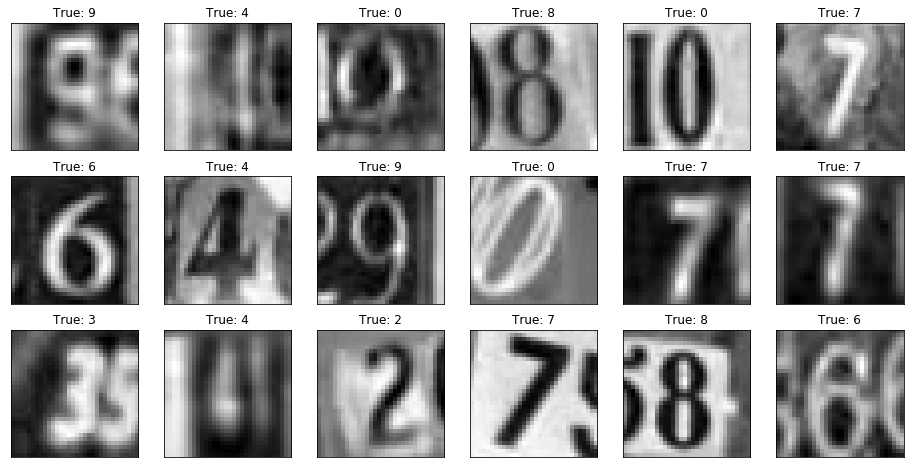

In [7]:

image_plot(train_X, 3, 6, train_y);



In [8]:
test_predictions = model.predict(test_X)

In [9]:
test_predictions

array([[1.47326602e-04, 1.14747649e-03, 9.10712290e-04, ...,
        1.95702203e-02, 3.93298687e-03, 9.82987508e-03],
       [3.61872117e-05, 6.64247927e-05, 9.99074340e-01, ...,
        2.92393728e-04, 1.21699377e-05, 1.03817954e-04],
       [5.06915057e-06, 9.88227785e-01, 1.22076977e-04, ...,
        3.57539790e-07, 8.44484675e-05, 3.21550829e-06],
       ...,
       [1.94335531e-04, 2.06085388e-03, 1.03681004e-02, ...,
        9.83381510e-01, 8.42775917e-05, 8.24882591e-04],
       [9.59275756e-04, 1.17969474e-04, 1.18092776e-05, ...,
        8.50390825e-06, 7.04540126e-03, 3.96784089e-05],
       [1.79088136e-06, 2.60403403e-03, 4.14444046e-04, ...,
        9.96894598e-01, 1.70448766e-06, 1.36159343e-07]], dtype=float32)

In [10]:
#look at first prediction
np.argmax(test_predictions[0])


5

In [11]:
#look at test set true value 
np.argmax(test_y[0])


5

In [12]:
pred_y =np.argmax(test_predictions,axis=1)
pred_true = np.argmax(test_y, axis=1)


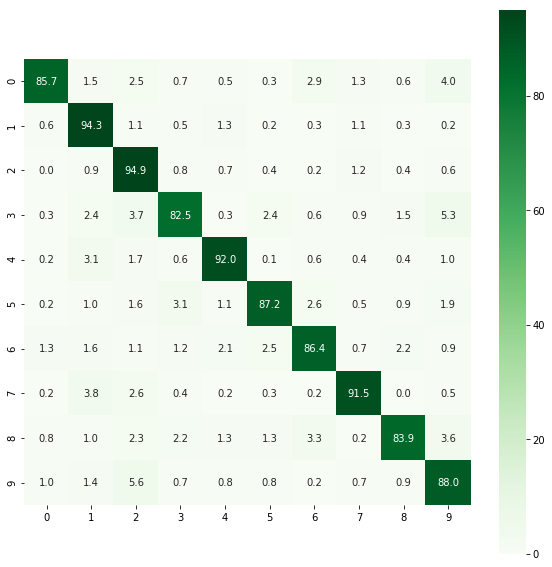

In [13]:
plt.figure(figsize=(10, 10))

#confusion matrix
con_matrix = confusion_matrix(pred_true,pred_y)

#normalzize 
con_matrix = con_matrix.astype('float') / con_matrix.sum(axis=1)[:, np.newaxis] * 100.0

#visualize confusion matrix
sns.heatmap(con_matrix, annot=True, cmap='Greens', fmt='.1f', square=True);

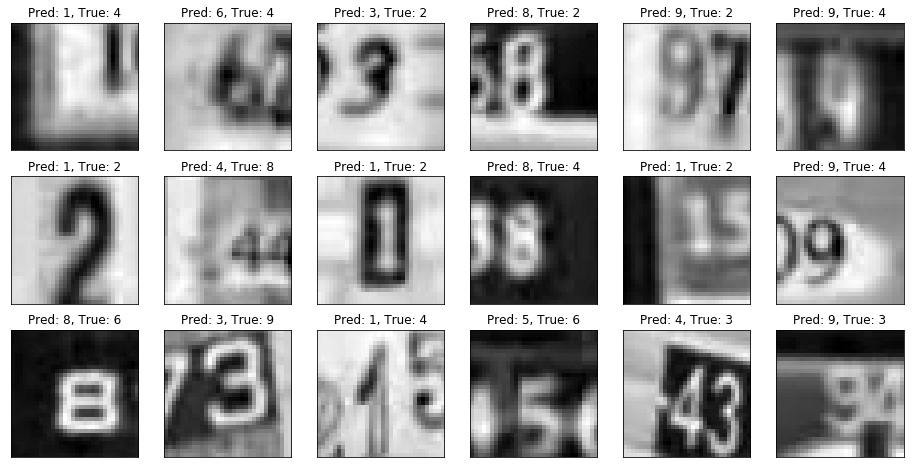

In [14]:
#find the wrong classified values
wrong = pred_y != pred_true

#plot them
image_plot(test_X[wrong], 3, 6, test_y[wrong], pred_y[wrong]);

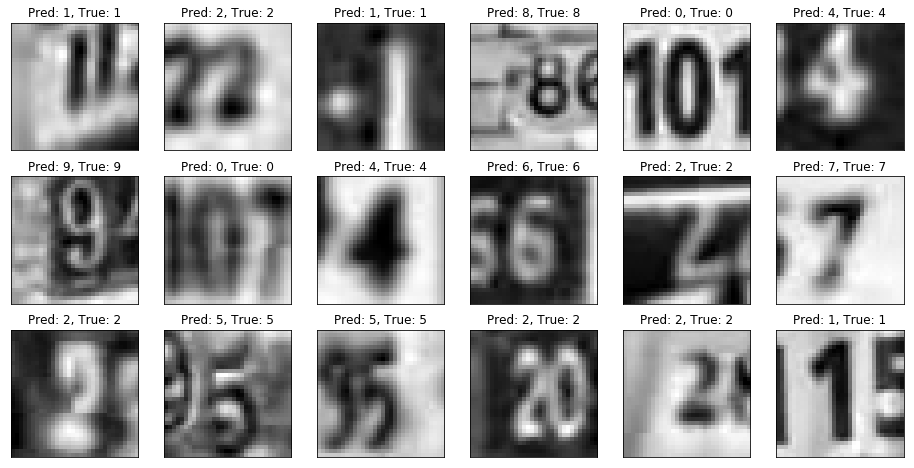

In [15]:
# Find the correctly classified examples
right = np.invert(wrong)

#plot them
image_plot(test_X[right], 3, 6, test_y[right], pred_y[right]);
